In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc("axes", unicode_minus = False)

## 데이터 구성하기

In [4]:
scale_train_x = pd.read_csv('C:/Users/박서린/py/scale_train_x.xls', usecols=lambda column: column != "Unnamed: 0")
scale_train_y = pd.read_csv('C:/Users/박서린/py/scale_train_y.xls', usecols=lambda column: column != "Unnamed: 0")
scale_test_x = pd.read_csv('C:/Users/박서린/py/scale_test_x.xls', usecols=lambda column: column != "Unnamed: 0")
scale_test_y = pd.read_csv('C:/Users/박서린/py/scale_test_y.xls', usecols=lambda column: column != "Unnamed: 0")

scale_train_x

,pt_width,fur_soak_time,rolling_temp,day,hour,minute,weekday_number,pt_length_cluster,steel_kind_T,rolling_method_TMCP(온도제어),...,work_group_3조,work_group_4조,is_high_strength_True,is_ship_steel_True,heat_temp_high_True,soak_temp_high_True,both_temp_high_True,descaling_parity_odd,rolling_temp_1000_low,hsb_적용
0,2800,82,1007,4,13,46,2,1,0,0,...,0,0,0,1,1,1,1,0,0,1
1,2700,57,956,5,11,4,3,1,0,0,...,0,0,0,0,0,0,0,0,1,1
2,3100,61,982,6,16,43,4,1,0,0,...,0,0,0,0,1,1,1,1,1,1
3,2900,58,902,10,0,45,1,1,0,0,...,0,1,0,1,1,1,1,0,1,0
4,3100,88,881,6,21,52,4,2,1,1,...,0,0,1,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,3100,81,856,3,15,42,1,2,1,1,...,0,0,1,1,0,0,0,0,1,1
691,2200,65,999,8,23,41,6,0,0,0,...,0,1,0,0,1,1,1,0,1,1
692,2300,77,876,7,9,49,5,2,1,0,...,1,0,0,0,0,0,0,0,1,1
693,2200,96,1046,4,23,37,2,0,0,0,...,0,0,1,0,1,1,1,0,0,1


In [5]:
scale_train_x.drop(['rolling_temp_1000_low'], axis = 1, inplace=True)
scale_test_x.drop(['rolling_temp_1000_low'], axis = 1, inplace = True)

## 모델 생성

In [6]:
rf_uncust = RandomForestClassifier(random_state=1234)
rf_uncust.fit(scale_train_x, scale_train_y)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(rf_uncust.score(scale_train_x, scale_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(rf_uncust.score(scale_test_x, scale_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.977


In [7]:
# 실행옵션 확인
print(rf_uncust.get_params().keys())
print(rf_uncust.get_params().values())

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])
dict_values([True, 0.0, None, 'gini', None, 'sqrt', None, None, 0.0, 1, 2, 0.0, None, 100, None, False, 1234, 0, False])


### @n_estimators(생성 트리 수) 변경에 따른 모델 성능

In [8]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

train_accuracy = []; test_accuracy = []
para_n_tree = [n_tree * 10 for n_tree in range(1, 20)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators=v_n_estimators, random_state=1234)
    rf.fit(scale_train_x, scale_train_y.values.ravel())  # ← 수정!
    train_accuracy.append(rf.score(scale_train_x, scale_train_y.values.ravel()))
    test_accuracy.append(rf.score(scale_test_x, scale_test_y.values.ravel()))

df_accuracy_n = pd.DataFrame({
    "n_estimators": para_n_tree,
    "TrainAccuracy": train_accuracy,
    "TestAccuracy": test_accuracy
})


In [9]:
para_n_tree

[10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190]

In [10]:
# 모델 정확도 확인
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.996,0.963
1,20,1.000,0.973
2,30,1.000,0.973
3,40,1.000,0.973
4,50,1.000,0.977
5,60,1.000,0.973
6,70,1.000,0.973
7,80,1.000,0.973
8,90,1.000,0.973
9,100,1.000,0.977


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

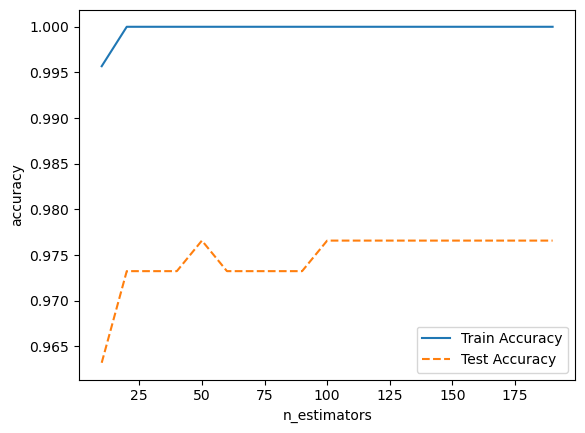

In [11]:
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("n_estimators"); plt.ylabel("accuracy")
plt.legend()

#### n_estimators: 트리의 개수 변경 시 모델의 oob error 변화

In [12]:
oob_error = []

for v_n_estimator in range(10, 121):  
    rf = RandomForestClassifier(n_estimators=v_n_estimator, oob_score=True, random_state=1234)
    rf.fit(scale_train_x, scale_train_y.values.ravel()) 
    oob_error.append(1 - rf.oob_score_)

Text(0.5, 0, 'n_estimators')

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

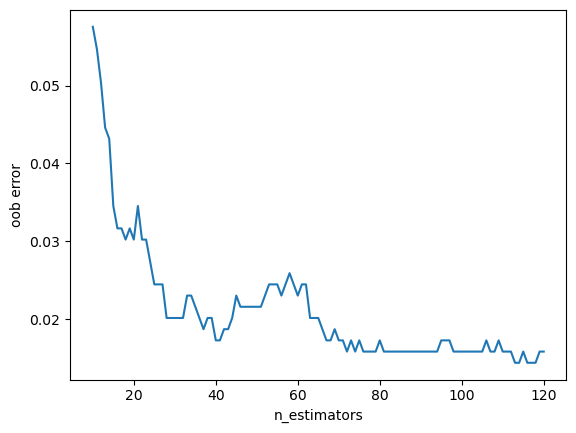

In [13]:
plt.plot(range(10, 121), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

### @max_depth(최대 깊이) 조정에 따른 정확도 변화

In [14]:
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(3, 20)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = v_max_depth, n_estimators=100, random_state=1234)
    rf.fit(scale_train_x, scale_train_y)
    train_accuracy.append(rf.score(scale_train_x, scale_train_y))
    test_accuracy.append(rf.score(scale_test_x, scale_test_y))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy


In [15]:
para_depth

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [16]:
# 모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,3,0.931,0.916
1,4,0.974,0.940
2,5,0.976,0.950
3,6,0.976,0.950
4,7,0.976,0.950
5,8,0.988,0.957
6,9,0.999,0.967
7,10,1.000,0.977
8,11,1.000,0.973
9,12,1.000,0.977


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

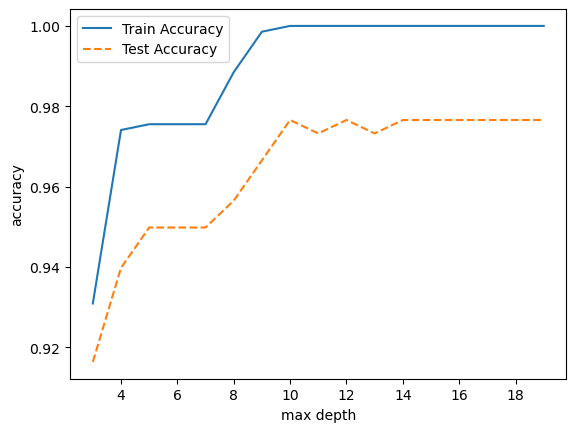

In [17]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("max depth"); plt.ylabel("accuracy")
plt.legend()

### @min_samples_split(분할 노드의 최소 샘플 수) 조정에 따른 정확도 변화

In [18]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수.
para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split = v_min_samples_split, max_depth=12,
                                n_estimators=100, random_state=1234)
    rf.fit(scale_train_x, scale_train_y)
    train_accuracy.append(rf.score(scale_train_x, scale_train_y))
    test_accuracy.append(rf.score(scale_test_x, scale_test_y))

df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [19]:
para_split

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [20]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.996,0.967
1,20,0.978,0.950
2,30,0.976,0.950
3,40,0.976,0.950
4,50,0.976,0.950
5,60,0.976,0.950
6,70,0.976,0.950
7,80,0.976,0.950
8,90,0.976,0.946
9,100,0.973,0.943


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

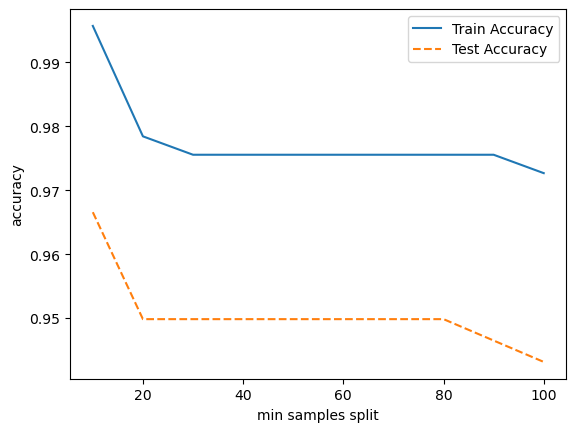

In [21]:
# 모델 정확도 그래프 확인
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples split"); plt.ylabel("accuracy")
plt.legend()

### @min_samples_leaf(최소 잎사귀 수) 조정에 따른 정확도 변화

In [22]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_leaf: 잎사귀 수 제한
para_leaf = [n_leaf * 1 for n_leaf in range(1, 20)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf,
                                max_depth=12, n_estimators=100, random_state=1234)
    rf.fit(scale_train_x, scale_train_y)
    train_accuracy.append(rf.score(scale_train_x, scale_train_y))
    test_accuracy.append(rf.score(scale_test_x, scale_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [23]:
para_leaf

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [24]:
# 모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,1,1.000,0.977
1,2,1.000,0.973
2,3,0.993,0.960
3,4,0.988,0.950
4,5,0.983,0.933
5,6,0.981,0.933
6,7,0.970,0.923
7,8,0.964,0.926
8,9,0.960,0.920
9,10,0.953,0.910


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

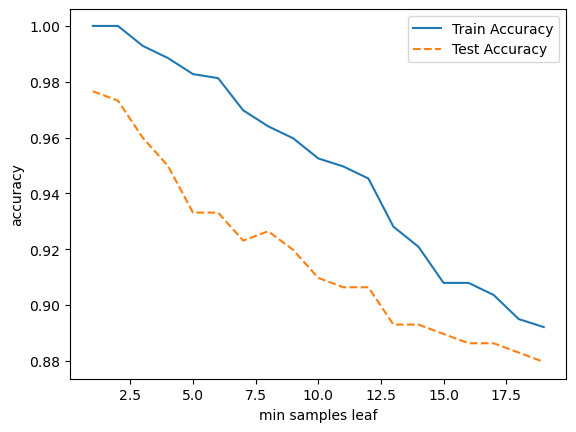

In [25]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples leaf"); plt.ylabel("accuracy")
plt.legend()

## 최종 모델

In [27]:
from sklearn.metrics import confusion_matrix, classification_report


rf_final = RandomForestClassifier(min_samples_leaf=1, max_depth=12, n_estimators=100, min_samples_split=2,
                                  random_state=1234
)
rf_final.fit(scale_train_x, scale_train_y.values.ravel())

# 예측
y_pred = rf_final.predict(scale_test_x)

# 정확도 평가
print("Accuracy on training set: {:.3f}".format(rf_final.score(scale_train_x, scale_train_y.values.ravel())))
print("Accuracy on test set: {:.3f}\n".format(rf_final.score(scale_test_x, scale_test_y.values.ravel())))

# confusion matrix
print("Confusion matrix: \n", confusion_matrix(scale_test_y, y_pred))

# F1-score 기반 분류 성능 평가
print("\nClassification report:\n", classification_report(scale_test_y, y_pred, digits=3))


Accuracy on training set: 1.000
Accuracy on test set: 0.977

Confusion matrix: 
 [[206   0]
 [  7  86]]

Classification report:
               precision    recall  f1-score   support

           0      0.967     1.000     0.983       206
           1      1.000     0.925     0.961        93

    accuracy                          0.977       299
   macro avg      0.984     0.962     0.972       299
weighted avg      0.977     0.977     0.976       299



#### 설명변수 중요도

In [28]:
v_feature_names = scale_train_x.columns

df_importance = pd.DataFrame()
df_importance ["Feature"] = v_feature_names
df_importance ["Importance"] = rf_final.feature_importances_
df_importance .sort_values("Importance", ascending=False, inplace = True)
df_importance .round(3)

,Feature,Importance
2,rolling_temp,0.368
19,hsb_적용,0.131
18,descaling_parity_odd,0.110
0,pt_width,0.078
1,fur_soak_time,0.050
4,hour,0.041
7,pt_length_cluster,0.038
5,minute,0.035
17,both_temp_high_True,0.024
16,soak_temp_high_True,0.022


In [29]:
# 설명변수 중요도 그래프
df_importance .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance ))
plt.barh(y = coordinates, width = df_importance ["Importance"])
plt.yticks(coordinates, df_importance ["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")min_samples_leaffrom sklearn.metrics import confusion_matrix, classification_report


rf_final = RandomForestClassifier(min_samples_leaf=1, max_depth=12, n_estimators=100, min_samples_split=20,
                                  random_state=1234
)
rf_final.fit(scale_train_x, scale_train_y.values.ravel())

# 예측
y_pred = rf_final.predict(scale_test_x)

# 정확도 평가
print("Accuracy on training set: {:.3f}".format(rf_final.score(scale_train_x, scale_train_y.values.ravel())))
print("Accuracy on test set: {:.3f}\n".format(rf_final.score(scale_test_x, scale_test_y.values.ravel())))

# confusion matrix
print("Confusion matrix: \n", confusion_matrix(scale_test_y, y_pred))

# F1-score 기반 분류 성능 평가
print("\nClassification report:\n", classification_report(scale_test_y, y_pred, digits=3))

SyntaxError: invalid syntax (4107393710.py, line 8)

#### GridSearchCV를 이용한 최적 parameter 찾기

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

estimator = RandomForestClassifier(n_estimators=100, random_state=1234)

param_grid = {
    "max_depth": para_depth,
    "min_samples_leaf": para_leaf,
    "min_samples_split":para_split
}

grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_rf.fit(scale_train_x, scale_train_y.values.ravel())

print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{:.3f}".format(grid_rf.best_score_))


In [32]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# 최적 파라미터
best_params_rf = {
    'n_estimators': 100,
    'max_depth': 12,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'random_state': 1234
}

# Stratified K-Fold 설정
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 결과 저장용 리스트
acc_list = []
f1_list = []
auc_list = []
fold = 1

X = scale_train_x
y = scale_train_y.values.ravel()

print("[랜덤포레스트 모델 - Stratified K-Fold 평가 + AUC]\n")

for train_idx, val_idx in skf.split(X, y):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    model = RandomForestClassifier(**best_params_rf)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]  # AUC용 확률값

    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    roc_auc = auc(fpr, tpr)

    acc_list.append(acc)
    f1_list.append(f1)
    auc_list.append(roc_auc)

    print(f"\n Fold {fold}")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {roc_auc:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))
    print(classification_report(y_val, y_pred, digits=3))

    fold += 1

# 평균 결과 출력
print("\n Stratified K-Fold 평균 성능 (RandomForest)")
print(f"Average Accuracy: {np.mean(acc_list):.4f}")
print(f"Average F1 Score: {np.mean(f1_list):.4f}")
print(f"Average AUC: {np.mean(auc_list):.4f}")


✅ [랜덤포레스트 모델 - Stratified K-Fold 평가 + AUC]


📂 Fold 1
Accuracy: 0.9712
F1 Score: 0.9545
AUC: 0.9957
Confusion Matrix:
[[93  2]
 [ 2 42]]
              precision    recall  f1-score   support

           0      0.979     0.979     0.979        95
           1      0.955     0.955     0.955        44

    accuracy                          0.971       139
   macro avg      0.967     0.967     0.967       139
weighted avg      0.971     0.971     0.971       139


📂 Fold 2
Accuracy: 0.9928
F1 Score: 0.9885
AUC: 1.0000
Confusion Matrix:
[[95  0]
 [ 1 43]]
              precision    recall  f1-score   support

           0      0.990     1.000     0.995        95
           1      1.000     0.977     0.989        44

    accuracy                          0.993       139
   macro avg      0.995     0.989     0.992       139
weighted avg      0.993     0.993     0.993       139


📂 Fold 3
Accuracy: 0.9784
F1 Score: 0.9639
AUC: 0.9983
Confusion Matrix:
[[96  0]
 [ 3 40]]
              precision

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

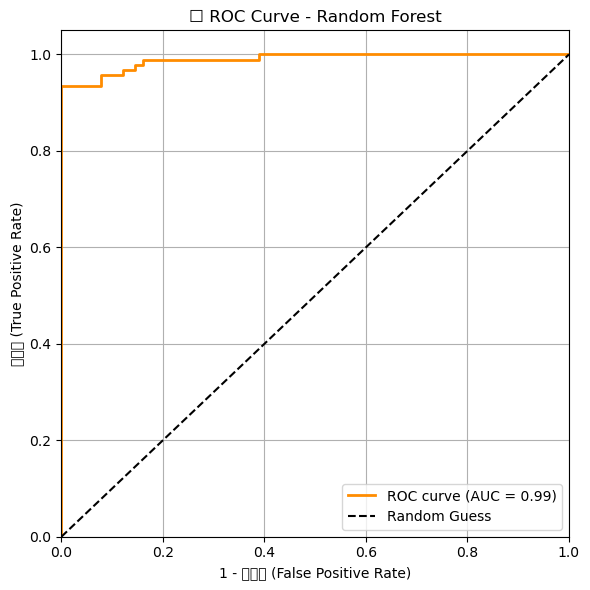

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 확률 예측 (클래스 1에 대한 확률)
y_prob_rf = rf_final.predict_proba(scale_test_x)[:, 1]  # rf_final은 최종 RandomForest 모델

# ROC Curve 계산
fpr, tpr, _ = roc_curve(scale_test_y, y_prob_rf)
roc_auc = auc(fpr, tpr)

# ROC Curve 시각화
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', linewidth=2,
         label=f"ROC curve (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("1 - 특이도 (False Positive Rate)")
plt.ylabel("민감도 (True Positive Rate)")
plt.title("☐ ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()
